In [44]:
import geopandas as gpd

import pandas as pd

alueet = gpd.read_file('pno.shp')
data = pd.read_csv('f2f_kodit.csv', sep = ',', dtype = str, encoding='cp1252',  error_bad_lines=False) 

In [46]:
#print(alueet.head())
#print(data)


In [48]:
alueet['answ'] = data['koti'].astype(str)

    

In [49]:
print(alueet.head())

   objectid posti_alue             nimi             namn kunta  kuntanro  \
0       1.0      90510       Hietasaari       Hietasaari   564     564.0   
1      38.0      92520           Sipola           Sipola   791     791.0   
2       2.0      90520  Taskila-Toppila  Taskila-Toppila   564     564.0   
3       3.0      90530       Välivainio       Välivainio   564     564.0   
4       4.0      90540      Kuivasjärvi      Kuivasjärvi   564     564.0   

    vuosi     pinta_ala    shape_leng  \
0  2018.0  4.157052e+06  15065.912188   
1  2018.0  5.492332e+07  30283.670048   
2  2018.0  3.718174e+06  10273.666383   
3  2018.0  2.283165e+06   6691.718986   
4  2018.0  2.773229e+07  24677.744795   

                                            geometry   answ  
0  (POLYGON ((425586.4833000014 7212020.5814, 425...  02650  
1  POLYGON ((445097.126600001 7139231.366, 444832...  00150  
2  POLYGON ((427575.4316000016 7212643.481000006,...  00700  
3  POLYGON ((429093.5459000021 7212287.617899999

In [50]:
b = alueet[['posti_alue', 'answ', 'geometry']]
am = b.groupby('answ')

In [51]:
kakka = gpd.GeoDataFrame()
kakka['i'] = None
kakka['maara'] = None

for i, group in am:
    kakka.loc[i, 'i'] = i
    kakka.loc[i, 'maara'] = len(group)

In [52]:
b = b.merge(kakka, left_on = 'posti_alue', right_on = 'i')



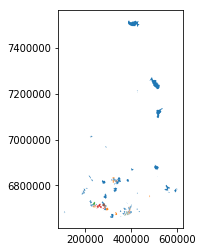

In [53]:
b.plot(column = 'maara')

In [55]:
poasd = 'f2f_kodit.shp'
b.to_file(poasd)